In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 # for pdfs
matplotlib.rcParams['svg.fonttype'] = 'none' # for svgs
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats
from pathlib import Path

import flexiznam as flz
from cottage_analysis.analysis import spheres, common_utils
from cottage_analysis.pipelines import pipeline_utils
from v1_depth_analysis.v1_manuscript_2023 import depth_selectivity, closed_loop_rsof, get_session_list, depth_decoder
from v1_depth_analysis.v1_manuscript_2023 import common_utils as v1_common_utils
from tqdm import tqdm

In [3]:
# Load example session
project = "hey2_3d-vision_foodres_20220101"
session_name_openloop = "PZAH10.2d_S20230602"
flexilims_session = flz.get_flexilims_session(project)

vs_df_example_openloop, trials_df_example_openloop = spheres.sync_all_recordings(
    session_name=session_name_openloop,
    flexilims_session=flexilims_session,
    project=project,
    filter_datasets={"anatomical_only": 3},
    recording_type="two_photon",
    protocol_base="SpheresPermTubeReward",
    photodiode_protocol=5,
    return_volumes=True,
)

neurons_ds_example_openloop = pipeline_utils.create_neurons_ds(
    session_name=session_name_openloop,
    flexilims_session=flexilims_session,
    project=None,
    conflicts="skip",
)
neurons_df_example_openloop = pd.read_pickle(neurons_ds_example_openloop.path_full)

Processing recording 1/2


Loading existing monitor frames...
Removing frames in wrong order of frame indices.
Removed 1754 frames including:
0 negative diffs.
1754 duplicates.
Removed 0 frames including:
0 negative diffs.
0 duplicates.
2 frames are not 0.0658 s
ImagingFrames in video: 71997
ImagingFrame triggers: 71998
Processing recording 2/2
Loading existing monitor frames...
Removing frames in wrong order of frame indices.
Removed 646 frames including:
0 negative diffs.
646 duplicates.
Removed 0 frames including:
0 negative diffs.
0 duplicates.
2 frames are not 0.0658 s
ImagingFrames in video: 44654
ImagingFrame triggers: 44655
Finished concatenating vs_df and trials_df


In [4]:
rois = neurons_df_example_openloop.sort_values("depth_tuning_test_spearmanr_rval_closedloop", ascending=False).head(50).roi.values

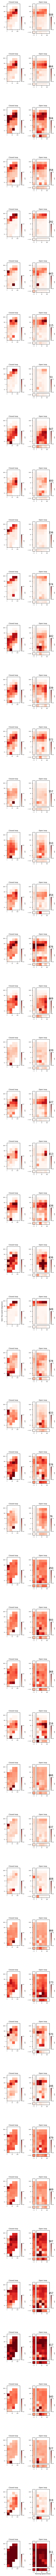

In [5]:
fontsize_dict = {"title": 8, "label": 7, "tick": 5, "legend": 5}
fig = plt.figure(figsize=(12, 12))
EXAMPLE_ROIS_OPENLOOP = rois
for iroi, roi in enumerate(EXAMPLE_ROIS_OPENLOOP):
    if iroi != (len(EXAMPLE_ROIS_OPENLOOP) - 1):
        xlabel = ""
    else:
        xlabel = "Running speed (cm/s)"
    if iroi != (len(EXAMPLE_ROIS_OPENLOOP) // 2):
        ylabel = ""
    else:
        ylabel = "Optic flow speed (degrees/s)"
    vmin, vmax = closed_loop_rsof.plot_RS_OF_matrix(
        fig=fig,
        trials_df=trials_df_example_openloop,
        roi=roi,
        log_range={
            "rs_bin_log_min": 0,
            "rs_bin_log_max": 2.5,
            "rs_bin_num": 6,
            "of_bin_log_min": -1.5,
            "of_bin_log_max": 3.5,
            "of_bin_num": 11,
            "log_base": 10,
        },
        is_closed_loop=1,
        vmin=0,
        vmax=None,
        xlabel="",
        ylabel=ylabel,
        title="Closed loop",
        plot_x=0.66,
        plot_y=0.47 - 0.3 * iroi,
        plot_width=0.15,
        plot_height=0.15,
        cbar_width=0.005,
        fontsize_dict=fontsize_dict,
    )

    closed_loop_rsof.plot_RS_OF_matrix(
        fig=fig,
        trials_df=trials_df_example_openloop,
        roi=roi,
        log_range={
            "rs_bin_log_min": 0,
            "rs_bin_log_max": 2.5,
            "rs_bin_num": 6,
            "of_bin_log_min": -1.5,
            "of_bin_log_max": 3.5,
            
            
            "of_bin_num": 11,
            "log_base": 10,
        },
        is_closed_loop=0,
        vmin=0,
        vmax=vmax,
        xlabel=xlabel,
        ylabel="",
        title="Open loop",
        plot_x=0.83,
        plot_y=0.47 - 0.3 * iroi,
        plot_width=0.15,
        plot_height=0.15,
        cbar_width=0.005,
        fontsize_dict=fontsize_dict,
    )
    plt.title(roi)